# ハイサンプリングデータのpandasでの記載法
## 参考
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

ハイサンプリングデータのpandasでの記載法は以下のとおり。

In [107]:
import pandas as pd
import numpy as np
import datetime

# ブラウザ内に画像を埋め込むための命令です
%matplotlib inline
%config inlineBackend.figure_format = 'retina'

In [75]:
# サンプリングレート
Fs  = 51200
Ts  = (1/Fs)*1e9
Tsp = (1/Fs)*1e12
print('サンプリング周波数{}'.format(Fs)+'Hzのサンプリング周期は{}'.format(Ts)+'nsとなる。')
print('サンプリング周波数{}'.format(Fs)+'Hzのサンプリング周期は{}'.format(Tsp)+'psとなる。')

サンプリング周波数51200Hzのサンプリング周期は19531.25nsとなる。
サンプリング周波数51200Hzのサンプリング周期は19531250.0psとなる。


In [24]:
pd.date_range('1969-JAN', periods=5, freq='{}N'.format(round(Ts)))

DatetimeIndex([          '1969-01-01 00:00:00',
               '1969-01-01 00:00:00.000019531',
               '1969-01-01 00:00:00.000039062',
               '1969-01-01 00:00:00.000058593',
               '1969-01-01 00:00:00.000078124'],
              dtype='datetime64[ns]', freq='19531N')

このように少し丸め誤差が入ってしまう。入らない方法は？

In [32]:
np.datetime64('2005-02', 'ps')

numpy.datetime64('1970-01-05T18:15:55.577426903040')

In [38]:
pd.timedelta_range(start='1 days', periods=5, freq='{}N'.format(round(Ts)))

TimedeltaIndex([       '1 days 00:00:00', '1 days 00:00:00.000019',
                '1 days 00:00:00.000039', '1 days 00:00:00.000058',
                '1 days 00:00:00.000078'],
               dtype='timedelta64[ns]', freq='19531N')

In [97]:
dt = pd.to_datetime('2014-11-09 10:00')
dt + 100*np.timedelta64(round(Tsp), 'ps')

Timestamp('2014-11-09 10:00:00.001953125')

In [103]:
a = pd.Series([100,200,300,400,500], index=[0,Tsp*1e-12,2*Tsp*1e-12,3*Tsp*1e-12,4*Tsp*1e-12]) 

In [105]:
a.index

Float64Index([0.0, 1.953125e-05, 3.90625e-05, 5.859375e-05, 7.8125e-05], dtype='float64')

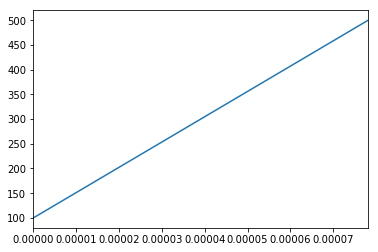

In [108]:
a.plot()